In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('/content/REGISTROS_IMIGRANTES_ATIVOS_2021_08.csv', sep=';')

In [3]:
dados.head()

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
0,RJ,PORTUGAL,Residente,71264
1,RJ,FRANÇA,Residente,5344
2,RJ,SUÍCA,Residente,1163
3,RJ,BÉLGICA,Residente,552
4,RJ,DINAMARCA,Residente,326


In [4]:
dados.shape

(5351, 4)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UF             5351 non-null   object
 1   NACIONALIDADE  5351 non-null   object
 2   CLASSIFICACAO  5351 non-null   object
 3   QTD            5351 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 167.3+ KB


In [6]:
dados['NACIONALIDADE'].nunique()

227

In [7]:
#rank com as maiores comunidades por estado
dados.sort_values('QTD', ascending=False).head(20)

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
517,SP,BOLÍVIA,Residente,80285
522,SP,PORTUGAL,Residente,79382
0,RJ,PORTUGAL,Residente,71264
4619,RR,VENEZUELA,Temporário,43268
518,SP,JAPÃO,Residente,41790
525,SP,CHINA,Residente,35391
2111,RS,URUGUAI,Residente,28150
523,SP,ITÁLIA,Residente,25827
519,SP,HAITI,Residente,23904
530,SP,ESPANHA,Residente,23346


In [8]:
#ideia é somar o total por nacionalidade, independente do estado em que vivem.
somaNacionalidade = dados.groupby(by=['NACIONALIDADE']).sum().sort_values('QTD', ascending=False)
somaNacionalidade

,QTD
NACIONALIDADE,
PORTUGAL,182446
VENEZUELA,162095
HAITI,131662
BOLÍVIA,101362
ARGENTINA,64522
...,...
SANTA HELENA,1
GUADALUPE,1
ILHAS BALEARES,1


In [9]:
somaNacionalidade['QTD'].sum()

1301012

In [10]:
somaNacionalidade['%'] = (100 * somaNacionalidade['QTD']) / somaNacionalidade['QTD'].sum()
somaNacionalidade

,QTD,%
NACIONALIDADE,,
PORTUGAL,182446,14.023391
VENEZUELA,162095,12.459147
HAITI,131662,10.119968
BOLÍVIA,101362,7.791012
ARGENTINA,64522,4.959370
...,...,...
SANTA HELENA,1,0.000077
GUADALUPE,1,0.000077
ILHAS BALEARES,1,0.000077


In [11]:
top20 = somaNacionalidade.head(20)
top20

,QTD,%
NACIONALIDADE,,
PORTUGAL,182446,14.023391
VENEZUELA,162095,12.459147
HAITI,131662,10.119968
BOLÍVIA,101362,7.791012
ARGENTINA,64522,4.959370
JAPÃO,57580,4.425785
CHINA,55298,4.250384
ITÁLIA,55072,4.233012
URUGUAI,47325,3.637553


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Quantidade migratória')

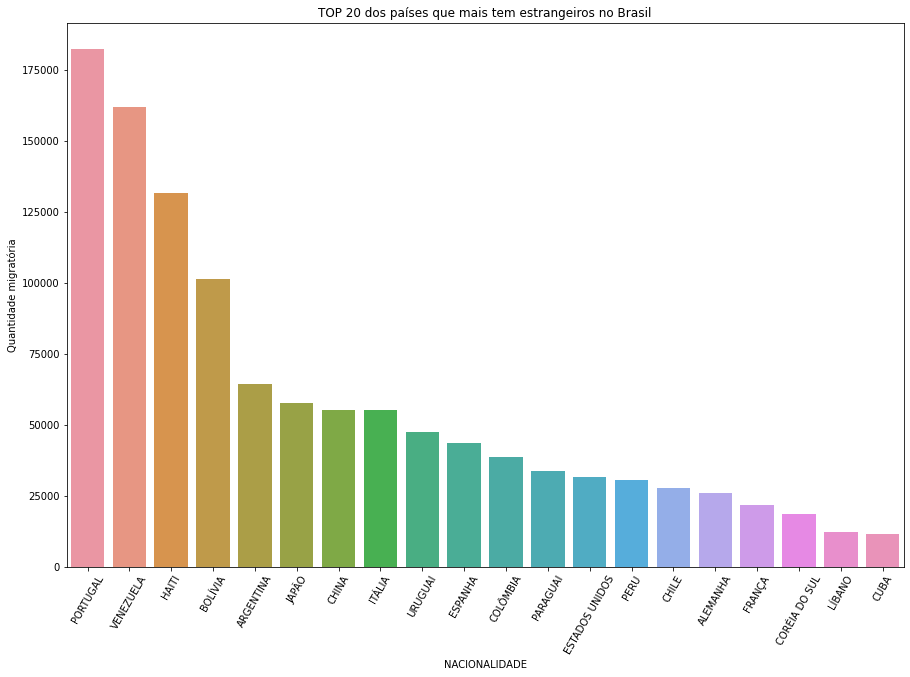

In [12]:
plt.figure(figsize=(15,10))
plt.title('TOP 20 dos países que mais tem estrangeiros no Brasil')
sns.barplot(top20.index, top20['QTD'])
plt.xticks(rotation=60)
plt.ylabel('Quantidade migratória')

In [13]:
imigrantesMS = dados.loc[dados['UF'] == 'MS']
imigrantesMS

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
2369,MS,VENEZUELA,Residente,764
2370,MS,HAITI,Temporário,941
2371,MS,JAPÃO,Residente,865
2372,MS,PARAGUAI,Residente,5918
2373,MS,VENEZUELA,Temporário,2592
...,...,...,...,...
4611,MS,NIGÉRIA,Provisório,1
4612,MS,GÂMBIA,Temporário,1
4613,MS,VIETINA,Temporário,1
5091,MS,LÍBIA,Residente,2


In [14]:
imigrantesMS.sort_values('QTD', ascending=False)

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
2372,MS,PARAGUAI,Residente,5918
2373,MS,VENEZUELA,Temporário,2592
2374,MS,BOLÍVIA,Residente,2264
2375,MS,HAITI,Residente,1709
2370,MS,HAITI,Temporário,941
...,...,...,...,...
4022,MS,PAÍSES BAIXOS,Temporário,1
4024,MS,SERRA LEOA,Residente,1
4026,MS,AZERBAIJÃO,Residente,1
4027,MS,RUANDA,Residente,1


In [15]:
totalImigrantesMS = imigrantesMS.groupby(['NACIONALIDADE']).sum().sort_values('QTD', ascending=False)
totalImigrantesMS

,QTD
NACIONALIDADE,
PARAGUAI,7207
VENEZUELA,3441
HAITI,2656
BOLÍVIA,2585
JAPÃO,865
...,...
FINLÂNDIA,1
NÍGER,1
HONG-KONG (R.A.E.),1


In [16]:
totalImigrantesMS['QTD'].sum()

21034

In [17]:
totalImigrantesMS['%'] = (100 * totalImigrantesMS['QTD']) / totalImigrantesMS['QTD'].sum()
totalImigrantesMS

,QTD,%
NACIONALIDADE,,
PARAGUAI,7207,34.263573
VENEZUELA,3441,16.359228
HAITI,2656,12.627175
BOLÍVIA,2585,12.289626
JAPÃO,865,4.112389
...,...,...
FINLÂNDIA,1,0.004754
NÍGER,1,0.004754
HONG-KONG (R.A.E.),1,0.004754


In [18]:
top20ms = totalImigrantesMS.head(20)
top20ms

,QTD,%
NACIONALIDADE,,
PARAGUAI,7207,34.263573
VENEZUELA,3441,16.359228
HAITI,2656,12.627175
BOLÍVIA,2585,12.289626
JAPÃO,865,4.112389
PORTUGAL,654,3.109252
CHINA,490,2.329562
COLÔMBIA,398,1.892175
LÍBANO,314,1.492821


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


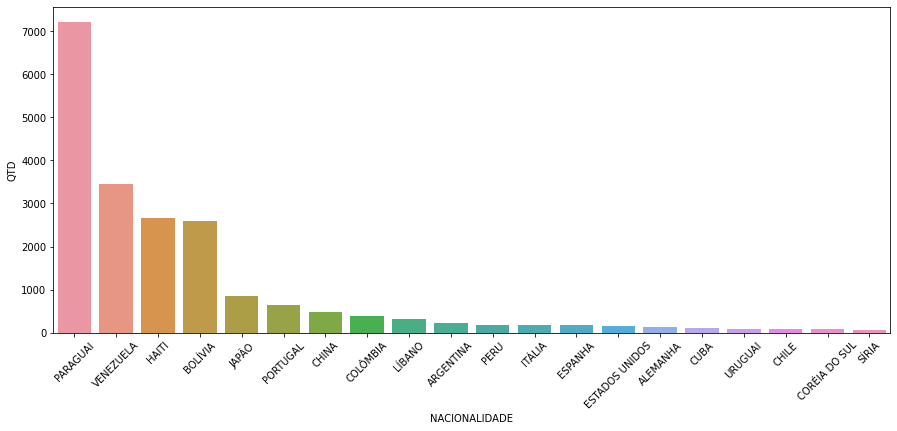

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(top20ms.index, top20ms['QTD'])
plt.xticks(rotation=45)
plt.show()

In [20]:
dados['CLASSIFICACAO'].unique()

array(['Residente', 'Temporário', 'Provisório', 'Fronteiriço'],
      dtype=object)

In [23]:
tipo_classificacao = dados.groupby(['CLASSIFICACAO']).sum().sort_values('QTD', ascending=False)
tipo_classificacao

,QTD
CLASSIFICACAO,
Residente,1072393
Temporário,200444
Provisório,20885
Fronteiriço,7290


In [24]:
tipo_classificacao.sum()

QTD    1301012
dtype: int64

In [28]:
100 * tipo_classificacao / tipo_classificacao.sum()

,QTD
CLASSIFICACAO,
Residente,82.427603
Temporário,15.406776
Provisório,1.605289
Fronteiriço,0.560333


In [29]:
tipo_classificacao['%'] = (100 * tipo_classificacao)/ tipo_classificacao.sum()

In [30]:
tipo_classificacao

,QTD,%
CLASSIFICACAO,,
Residente,1072393,82.427603
Temporário,200444,15.406776
Provisório,20885,1.605289
Fronteiriço,7290,0.560333


In [33]:
dadosms = dados.loc[dados['UF'] == 'MS']
dadosms

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
2369,MS,VENEZUELA,Residente,764
2370,MS,HAITI,Temporário,941
2371,MS,JAPÃO,Residente,865
2372,MS,PARAGUAI,Residente,5918
2373,MS,VENEZUELA,Temporário,2592
...,...,...,...,...
4611,MS,NIGÉRIA,Provisório,1
4612,MS,GÂMBIA,Temporário,1
4613,MS,VIETINA,Temporário,1
5091,MS,LÍBIA,Residente,2


In [36]:
dadosms.groupby(['CLASSIFICACAO']).sum().sort_values('QTD',ascending=False)

,QTD
CLASSIFICACAO,
Residente,15420
Temporário,5046
Fronteiriço,396
Provisório,172


In [41]:
dadosms.loc[dadosms['CLASSIFICACAO'] == 'Temporário'].sort_values('QTD', ascending=False)

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
2373,MS,VENEZUELA,Temporário,2592
2370,MS,HAITI,Temporário,941
2384,MS,PARAGUAI,Temporário,938
2430,MS,BOLÍVIA,Temporário,270
2390,MS,COLÔMBIA,Temporário,130
2841,MS,CHINA,Temporário,38
2378,MS,CHILE,Temporário,14
2411,MS,SENEGAL,Temporário,12
2836,MS,CUBA,Temporário,11
2455,MS,ARGENTINA,Temporário,11


In [43]:
#verificar quantidade de chineses

In [46]:
dadoschina = dados.loc[dados['NACIONALIDADE'] == 'CHINA'].sort_values('QTD', ascending=False)
dadoschina

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
525,SP,CHINA,Residente,35391
28,RJ,CHINA,Residente,6020
662,PR,CHINA,Residente,3261
1555,MG,CHINA,Residente,1449
1097,BA,CHINA,Residente,863
...,...,...,...,...
3050,PB,CHINA,Provisório,1
4661,RR,CHINA,Provisório,1
4837,AP,CHINA,Temporário,1
1941,PA,CHINA,Provisório,1


In [54]:
dadoschina.loc[dadoschina['UF'] == 'SP']

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
525,SP,CHINA,Residente,35391
528,SP,CHINA,Temporário,796
625,SP,CHINA,Provisório,373


In [49]:
dadoschina.groupby('CLASSIFICACAO').sum().sort_values('QTD', ascending=False)

,QTD
CLASSIFICACAO,
Residente,53386
Temporário,1495
Provisório,417


In [50]:
dados.isnull().sum()

UF               0
NACIONALIDADE    0
CLASSIFICACAO    0
QTD              0
dtype: int64

In [51]:
dados.describe()

,QTD
count,5351.000000
mean,243.134367
std,2365.398036
min,1.000000
25%,2.000000
50%,5.000000
75%,30.000000
max,80285.000000


In [52]:
#acessar informaçoes do RN

In [58]:
dadosrn = dados.loc[dados['UF'] == 'RN'].sort_values('QTD', ascending=False)
dadosrn

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
4075,RN,ARGENTINA,Residente,1259
4072,RN,ITÁLIA,Residente,1216
4071,RN,PORTUGAL,Residente,1081
4087,RN,ESPANHA,Residente,669
4089,RN,COLÔMBIA,Residente,395
...,...,...,...,...
4198,RN,TOGO,Residente,1
4200,RN,LETÔNIA,Temporário,1
4202,RN,MALÁSIA,Residente,1
4203,RN,PAÍSES BAIXOS,Provisório,1


In [60]:
dadosrn.groupby('NACIONALIDADE').sum().sort_values('QTD', ascending=False)

,QTD
NACIONALIDADE,
ARGENTINA,1300
ITÁLIA,1224
PORTUGAL,1093
ESPANHA,699
COLÔMBIA,556
...,...
CHIPRE,1
GUIANA,1
GUATEMALA,1


In [65]:
dados.corr()

,QTD
QTD,1.0


In [66]:
classificacao_rn = dadosrn.groupby('CLASSIFICACAO').sum().sort_values('QTD', ascending=False)
classificacao_rn

,QTD
CLASSIFICACAO,
Residente,8036
Temporário,659
Provisório,95


In [67]:
classificacao_rn['%'] = (100 * classificacao_rn['QTD'])/ classificacao_rn['QTD'].sum()
classificacao_rn

,QTD,%
CLASSIFICACAO,,
Residente,8036,91.422071
Temporário,659,7.497156
Provisório,95,1.080774


In [68]:
dados

,UF,NACIONALIDADE,CLASSIFICACAO,QTD
0,RJ,PORTUGAL,Residente,71264
1,RJ,FRANÇA,Residente,5344
2,RJ,SUÍCA,Residente,1163
3,RJ,BÉLGICA,Residente,552
4,RJ,DINAMARCA,Residente,326
...,...,...,...,...
5346,CE,HAITI,Provisório,1
5347,ES,UGANDA,Temporário,1
5348,BA,ARGENTINA,Fronteiriço,1
5349,PA,CORÉIA DO SUL,Temporário,4


In [70]:
#usando filter
usandofilter = dados.filter(items=['NACIONALIDADE', 'QTD'])
usandofilter

,NACIONALIDADE,QTD
0,PORTUGAL,71264
1,FRANÇA,5344
2,SUÍCA,1163
3,BÉLGICA,552
4,DINAMARCA,326
...,...,...
5346,HAITI,1
5347,UGANDA,1
5348,ARGENTINA,1
5349,CORÉIA DO SUL,4
